# A/B TESTING

<img src="image/matrix.jpeg" width="700">

### Dataset:  
users.csv

### Objective: 
A/B testing to increase conversion rate of users on website if the button changes its color, from blue to red.

### Metric: 
the metric used was the click of users (CR) on the webpage, considering the blue color as 'old button' and red color as 'new button'. So the null and alternative hypotheses were:

* H0: CR_red — CR_blue <= 0
* H1: CR_red — CR_blue > 0

## Import packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [6]:
df = pd.read_csv('data/users.csv')

## EDA

In [7]:
# close look at the dataset
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [8]:
# lines and columns of the dataset
df.shape

(8188, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
timestamp    8188 non-null object
id           8188 non-null int64
group        8188 non-null object
action       8188 non-null object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


In [10]:
# checking quantity of each group
df.group.value_counts()

control       4264
experiment    3924
Name: group, dtype: int64

In [11]:
# checking missing values
df.isnull().sum()

timestamp    0
id           0
group        0
action       0
dtype: int64

In [15]:
# descriptive statistic
df.describe()

,id
count,8188.000000
mean,564699.749878
std,219085.845672
min,182988.000000
25%,373637.500000
50%,566840.500000
75%,758078.000000
max,937217.000000


it's impossible to use those results because id works as a primary key of the dataset

In [17]:
#correlation
df.corr()

,id
id,1.0


it's impossible to use that outcome because id works as a primary key of the dataset (there's no way of measuring correlation among features)

In [ ]:
# who provides more traffic on Internet: Experiment Group X Control Group

In [32]:
control_group = df.query('group == "control"')
control_CR = (control_group.query('action == "click"').id.nunique() / control_group.query('action == "view"').id.nunique())*100
experiment_group = df.query('group == "experiment"')
experiment_CR = (experiment_group.query('action == "click"').id.nunique() / experiment_group.query('action == "view"').id.nunique())*100

print(f'The click rate (CR) of the CONTROL GROUP is around: {control_CR:.2f}%')
print(f'The click rate (CR) of the EXPERIMENT GROUP is around: {experiment_CR:.2f}%')

The click rate (CR) of the CONTROL GROUP is around: 27.97%
The click rate (CR) of the EXPERIMENT GROUP is around: 30.97%


## A/B TESTING

In [56]:
# computing the observed difference between the metric CR:  CONTROL GROUP X EXPERIMENT GROUP
obs_diff = experiment_CR - control_CR
obs_diff_ = (experiment_CR - control_CR)/100
print(f'The observed difference between the metric (CR) is about: {obs_diff:.4f}%')

The observed difference between the metric (CR) is about: 3.0034%


In [87]:
# plotting histograms to take a look at the difference between sampling distribution in blue color and 
# the distribution under the null hypothesis (random normal distribution centered at 0 with the same spread and size) in green color 

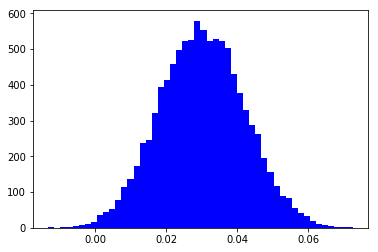

In [93]:
diffs = []
for _ in range(10000):
    b_sample = df.sample(df.shape[0], replace=True) #bootstrap sampling
    control_df = b_sample.query('group == "control"')
    experiment_df = b_sample.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)
diffs = np.array(diffs)
plt.hist(diffs, bins=50, color = 'blue');

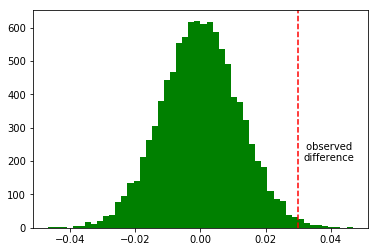

In [91]:
np.random.seed(42)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

ax = plt.hist(null_vals, bins=50, color='green')
plt.axvline(x=obs_diff_, color='red', linestyle='--')
plt.text(x = obs_diff_*1.05, y = ax[0].mean(), s=' observed\ndifference');

As we observed, the chance to see our observed difference under our null hypothesis seemed to be small


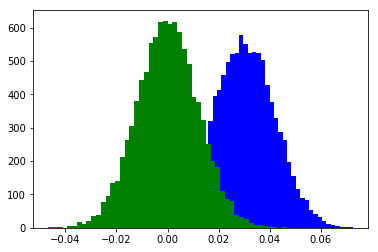

In [92]:
plt.hist(diffs, bins=50, color ='blue');
ax = plt.hist(null_vals, bins=50, color='green')


As we observed, the chance to see our observed difference under our null hypothesis seemed to be small

In [98]:
# P-value calculation 
p_value = (null_vals > obs_diff_).mean()
print(f'The p-value is {p_value:.5f}')

The p-value is 0.00650


this p-value is used to determine the statistical significance of the observed difference.

## Conclusion

With a type I error rate tolerance of 0.05, we reject the null hypothesis, and decide to change the color of the button from blue to red in order to increse the convertion rate